In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#学習用データと評価用データの読み込み
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [3]:
#データのサイズ確認
print(train.shape)
print(test.shape)

(1516, 3)
(1517, 2)


In [4]:
#学習用データの中身を確認
train.head()

,id,description,jobflag
0,0,<li>Develop cutting-edge web applications that...,3
1,1,"<li> Designs and develops high quality, scalab...",3
2,2,<li>Functions as a point person for Network St...,4
3,3,"<li> Work on the technical design, development...",3
4,4,<li>Quantify the resources required for a task...,4


In [5]:
#評価用データの中身を確認
test.head()

,id,description
0,1516,<li>Building decision-making models and propos...
1,1517,<li>Educate homeowners on the benefits of sola...
2,1518,"<li><span>Design, develop, document, and imple..."
3,1519,<li>Apply advanced technical expertise and ski...
4,1520,<li>Project manage and deliver against our roa...


4    505
1    468
3    455
2     88
Name: jobflag, dtype: int64


<AxesSubplot:>

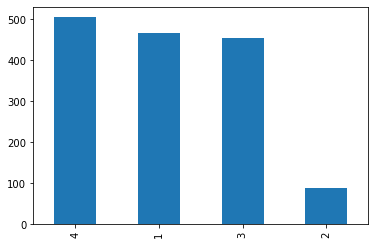

In [6]:
#学習用データに含まれるjobflagをカウント（＋可視化）
print(train["jobflag"].value_counts())
train["jobflag"].value_counts().plot(kind="bar")

In [7]:
#学習用データ, 評価用データのdescriptionに含まれる文字数を確認
train_length = train["description"].str.len()
test_length = test["description"].str.len()

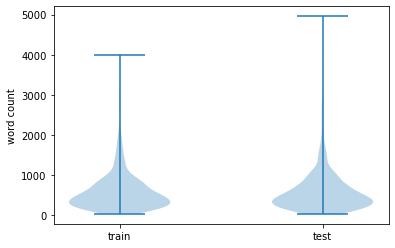

In [8]:
#可視化
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.violinplot([train_length, test_length])
ax.set_xticks([1, 2])
ax.set_xticklabels(["train", "test"])
ax.set_ylabel("word count")
plt.show()

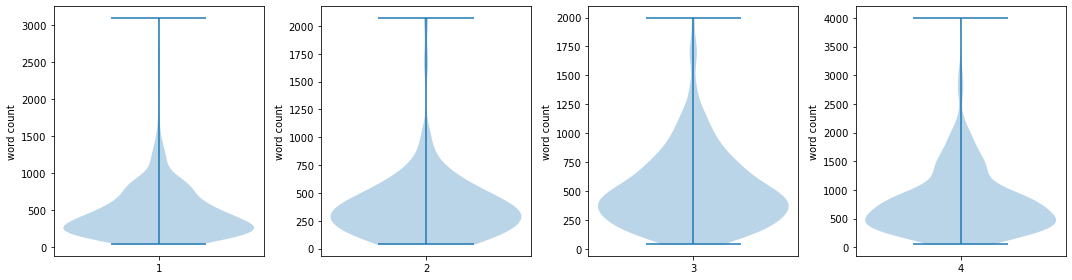

In [9]:
#学習用データの職業ラベル(jobflag)ごとの文字数を確認
fig = plt.figure(figsize = (15, 4))
for flag in [1, 2, 3, 4]:
    train_length_flag = train[train["jobflag"] == flag]["description"].str.len()
    ax = fig.add_subplot(1, 4, flag)
    ax.violinplot(train_length_flag)
    ax.set_xticks([1])
    ax.set_xticklabels([flag])
    ax.set_ylabel("word count")
plt.tight_layout()
plt.show()

In [10]:
#学習用データと評価用データを結合する (両データに対し一括で前処理を行うため)
combined = train.append(test, ignore_index=True)

In [11]:
#以下の手順でdescriptionデータのクリーニングを行う.
# <li>などのhtmlタグを削除する
# アルファベット以外の文字をスペースに置き換える
# 単語長が3文字以下のものは削除する
# ステミング（単語の語幹を取り出す作業のこと. 派生語を同じ単語として扱えるようにする）

import re
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def cleaning(texts):
    clean_texts = []
    for text in texts:
        # htmlタグを削除
        text = remove_tag(text)
        # アルファベット以外をスペースに置き換え
        clean_punc = re.sub(r'[^a-zA-Z]', ' ', text)
        # 単語長が3文字以下のものは削除する
        clean_short_tokenized = [word for word in clean_punc.split() if len(word) > 3]
        # ステミング
        clean_normalize = [stemmer.stem(word) for word in clean_short_tokenized]
        # 単語同士をスペースでつなぎ、文章に戻す
        clean_text = ' '.join(clean_normalize)
        clean_texts.append(clean_text)
    return clean_texts

def remove_tag(x):
    p = re.compile(r"<[^>]*?>")
    return p.sub('',x)

combined_cleaned = combined.copy()
combined_cleaned["description"] = cleaning(combined["description"])

In [12]:
pd.set_option('display.max_rows', 100)
pd.set_option('max_colwidth', 3000)
combined_cleaned[combined_cleaned["jobflag"] == 2]

,id,description,jobflag
10,10,optim deep learn framework like tensorflow pytorch gpu upstream open sourc repositori collabor interact with intern librari team analyz optim train infer deep learn work distribut comput set optim both scale multi scale multi node system work with cut edg compil technolog optim entir deep learn pipelin includ graph compil integr,2.0
13,13,research prototyp identifi build predict productsy will write test ensur robust reliabl your production modelsy will guid mentor team member help educ busi possibl,2.0
32,32,optim model method determin live real human face deliv optim model develop team integr app commun with both intern parti technic team wish integr model into their app,2.0
47,47,work togeth with team perform research test evalu exist emerg method technolog that could effect appli contractu legal knowledg abl appli techniqu order maintain extend current rule base supervis unsupervis method knowledg abl appli algorithm technolog task such name entiti recognit tag pars sentiment analysi cluster text predict understand assist improv exist train mainten enrich process,2.0
68,68,implement appropri algorithmsresearch implement appropri algorithm toolsperform statist analysi fine tune use test resultstrain retrain system when necessaryextend exist librari frameworkskeep abreast develop field requir,2.0
69,69,contribut decis make that will lead success deliveri project,2.0
93,93,collabor with multipl partner team such busi technolog product manag legal complianc strategi busi manag deploy solut into product,2.0
104,104,work across stack build deploy applic,2.0
129,129,build next gener platform support growth effort across world,2.0
159,159,implement manag model lifecycl use mlop practic,2.0


In [13]:
print('#original\n', combined["description"][0])
print("-----")
print('#cleaned\n', combined_cleaned["description"][0])

#original
 <li>Develop cutting-edge web applications that perform superbly across all platforms.</li><li>Work in a highly collaborative environment with cross-functional teams on projects ranging from a few weeks to a few months in length.</li><li>Maintain high standard of quality as you creatively and strategically problem solve throughout the product delivery process.</li><li>Be able to effectively communicate your work with both technical and non-technical peers</li><li>Be excited about new web technologies/techniques</li><li>Build solid front-end architectures that integrate easily with other systems and technologies</li><li>Working closely with other disciplines (Back-end, UX, Design, QA)</li><li>Have a superior attention to detail and a strong ability to Q/A one\'s own work required, including cross-browser and cross-platform displays and performance</li></ul>
-----
#cleaned
 develop cut edg applic that perform superbl across platform work highli collabor environ with cross funct

In [14]:
#TF-IDF(文章中の単語とその頻度から重要な単語は何でああるのか数値化する手法)を用いて、descriptionをベクトル化する

from sklearn.feature_extraction.text import TfidfVectorizer

bow_vectorizer = TfidfVectorizer(max_df = 0.90, min_df = 2, max_features = 2000, stop_words="english")
bow = bow_vectorizer.fit_transform(combined_cleaned["description"])
print(bow.shape)

(3033, 2000)


In [15]:
#学習用データを分割して, 投稿前の精度検証を行う

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

delimit_num = train.shape[0]
train_bow = bow[:delimit_num, :]
test_bow = bow[delimit_num:, :]

x_bow_train, x_bow_valid, y_bow_train, y_bow_valid = train_test_split(train_bow, train["jobflag"], test_size = 0.3, random_state = 0)

y_bow_train = LabelEncoder().fit_transform(y_bow_train)
y_bow_valid = LabelEncoder().fit_transform(y_bow_valid)

x_bow_train = x_bow_train.astype('float32')
x_bow_valid = x_bow_valid.astype('float32')
y_bow_train = y_bow_train.astype('float32')
y_bow_valid = y_bow_valid.astype('float32')

In [16]:
print(x_bow_train)

  (0, 231)	0.33470184
  (0, 501)	0.12993589
  (0, 713)	0.30033624
  (0, 899)	0.4109938
  (0, 999)	0.3632986
  (0, 1100)	0.23811918
  (0, 1246)	0.18833031
  (0, 1331)	0.34339324
  (0, 1473)	0.21432069
  (0, 1479)	0.31632504
  (0, 1778)	0.29340905
  (0, 1789)	0.19446328
  (1, 60)	0.18992096
  (1, 176)	0.34076878
  (1, 301)	0.17265333
  (1, 501)	0.23209597
  (1, 794)	0.21631217
  (1, 868)	0.2816891
  (1, 950)	0.25249553
  (1, 1076)	0.18224062
  (1, 1100)	0.14177892
  (1, 1108)	0.16038315
  (1, 1154)	0.25372052
  (1, 1246)	0.11213404
  (1, 1343)	0.10569058
  :	:
  (1059, 903)	0.18755393
  (1059, 985)	0.14517717
  (1059, 1033)	0.09262747
  (1059, 1116)	0.1559428
  (1059, 1169)	0.13365935
  (1059, 1204)	0.21582377
  (1059, 1492)	0.13961233
  (1059, 1496)	0.14832565
  (1059, 1516)	0.1523937
  (1059, 1718)	0.24420014
  (1059, 1729)	0.1977497
  (1059, 1900)	0.13749667
  (1059, 1902)	0.18322404
  (1059, 1933)	0.25333315
  (1059, 1977)	0.09003312
  (1060, 231)	0.18234704
  (1060, 267)	0.3717997
 

In [18]:
#XGBを用いて分類器を作成し、学習・予測を行う

from sklearn.svm import SVC

mod = SVC()
mod.fit(x_bow_train,y_bow_train)
pred = mod.predict(x_bow_valid)

              precision    recall  f1-score   support

           0      0.664     0.723     0.692       137
           1      1.000     0.045     0.087        22
           2      0.869     0.813     0.840       139
           3      0.720     0.803     0.759       157

    accuracy                          0.745       455
   macro avg      0.813     0.596     0.595       455
weighted avg      0.762     0.745     0.731       455



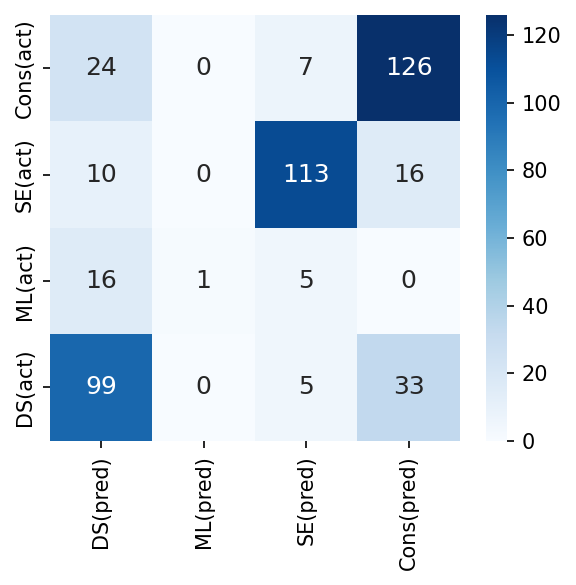

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
labels = [0, 1, 2, 3]
re_labels = ["DS", "ML", "SE", "Cons"]

#混同行列の作成
conf_mx = confusion_matrix(y_bow_valid, pred, labels = labels)
conf_df = pd.DataFrame(data = conf_mx, index = [x + "(act)" for x in re_labels], columns = [x + "(pred)" for x in re_labels])

#可視化
plt.figure(figsize = (4, 4), dpi = 150)
sns.heatmap(conf_df, cmap='Blues', annot=True, fmt='d', annot_kws={"size": 12}).invert_yaxis()
plt.tight_layout()

 
print(classification_report(y_bow_valid, pred, labels=labels, digits=3))

In [20]:
train_bow = train_bow.astype('float32')
test_bow = test_bow.astype('float32')

In [21]:
mod.fit(train_bow, LabelEncoder().fit_transform(train["jobflag"]))
pred_sub = mod.predict(test_bow)

In [22]:
le = LabelEncoder()
le.fit([1, 2, 3, 4])
# デコード
pred_sub = le.inverse_transform(pred_sub)

In [23]:
pred_sub

array([1, 4, 3, ..., 3, 1, 1])

In [24]:
sample_submit_df = pd.DataFrame([test["id"], pred_sub]).T
sample_submit_df.to_csv('./sample.csv', header=None, index=None, float_format='%g')

In [25]:
train_bow

<1516x2000 sparse matrix of type '<class 'numpy.float32'>'
	with 52028 stored elements in Compressed Sparse Row format>